# Introducción

En este reto se analizará la base de datos tratada en la parte 1 del challenge Telecom X, que contiene información sobre clientes, suscripciones y servicios. El objetivo es explorar los datos para encontrar patrones de comportamiento y las principales causas de cancelación del servicio.

Se aplicarán técnicas de limpieza, transformación, visualización y análisis estadístico, enfocándose en la distribución de suscripciones, uso de servicios, satisfacción y retención de clientes.

Con los hallazgos del análisis, se construirá un modelo de Machine Learning capaz de predecir la probabilidad de que un cliente abandone el servicio, basandonos en las caraterisiticas de los clientes.

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

# Importación de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import requests
import json
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
import pickle

#Extracción del Archivo Tratado

In [ ]:
df = pd.read_csv('datos_tratados.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.15
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.96
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.42
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.21
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.75


# Eliminación de Columnas Irrelevantes

In [ ]:
df.drop(columns= 'customerID', inplace=True)

In [ ]:
df['InternetService'] = np.where(df['InternetService'] == 'No', 0, 1)

In [ ]:
df.drop(columns='Cuentas_Diarias', inplace=True)

In [ ]:
df.drop(columns='gender', inplace=True)

# Verificación de la Proporción de Cancelación (Churn)

Proporción de clases:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


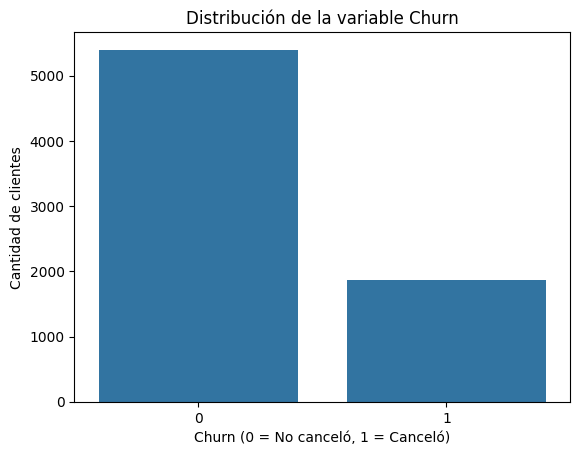

⚠️ Existe un desbalance importante entre las clases.


In [ ]:
# Calcular proporción de cada clase
class_counts = df['Churn'].value_counts(normalize=True)

# Mostrar resultados en porcentaje
print("Proporción de clases:")
print(class_counts * 100)

# Visualización
sns.countplot(x='Churn', data=df)
plt.title("Distribución de la variable Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Cantidad de clientes")
plt.show()

# Evaluación de desbalance
ratio = class_counts.min() / class_counts.max()
if ratio < 0.5:
    print("⚠️ Existe un desbalance importante entre las clases.")
else:
    print("✅ Las clases están relativamente balanceadas.")


In [ ]:
df['InternetService']

,InternetService
0,1
1,1
2,1
3,1
4,1
...,...
7262,1
7263,1
7264,1
7265,1


## Normalizacion Variables Categoricas

In [ ]:
# Lista de variables categóricas a transformar
categorical_cols = [ 'Contract', 'PaymentMethod']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(data = df, columns=categorical_cols, dtype=int)

# Revisar las primeras filas
display(df_encoded.head())


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Charges.Monthly,Charges.Total,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,1,0,1,...,1,65.6,593.30,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,1,0,0,...,0,59.9,542.40,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,1,0,0,...,1,73.9,280.85,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,1,0,1,...,1,98.0,1237.85,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,1,0,0,...,1,83.9,267.40,1,0,0,0,0,0,1


In [ ]:
corr = df_encoded.corr()

In [ ]:
corr['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.395584
PaymentMethod_Electronic check,0.294626
InternetService,0.224051
Charges.Monthly,0.189866
PaperlessBilling,0.186666
SeniorCitizen,0.146733
StreamingTV,0.062430
StreamingMovies,0.060586
MultipleLines,0.039343


In [ ]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Charges.Monthly,Charges.Total,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,1,0,1,...,1,65.6,593.30,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,1,0,0,...,0,59.9,542.40,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,1,0,0,...,1,73.9,280.85,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,1,0,1,...,1,98.0,1237.85,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,1,0,0,...,1,83.9,267.40,1,0,0,0,0,0,1


## Normalización de las variables numéricas

In [ ]:
y = df_encoded['Churn']
X = df_encoded.drop(columns= 'Churn')

In [ ]:
normalizador = MinMaxScaler()
columnas_a_normalizar = ['Charges.Monthly', 'Charges.Total','tenure']
X[columnas_a_normalizar] = normalizador.fit_transform(X[columnas_a_normalizar])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7267 non-null   int64  
 1   Partner                                  7267 non-null   int64  
 2   Dependents                               7267 non-null   int64  
 3   tenure                                   7267 non-null   float64
 4   PhoneService                             7267 non-null   int64  
 5   MultipleLines                            7267 non-null   int64  
 6   InternetService                          7267 non-null   int64  
 7   OnlineSecurity                           7267 non-null   int64  
 8   OnlineBackup                             7267 non-null   int64  
 9   DeviceProtection                         7267 non-null   int64  
 10  TechSupport                              7267 no

In [ ]:
X['Charges.Monthly']

,Charges.Monthly
0,0.471144
1,0.414428
2,0.553731
3,0.793532
4,0.653234
...,...
7262,0.367164
7263,0.665174
7264,0.318905
7265,0.493532


# Modelado predictivo

### Separación de variables explicativas y variable respuesta

In [ ]:
# 70% entrenamiento, 15% test y 15% validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=5)

In [ ]:
oversampling = SMOTE(random_state= 5)
X_train_balanceada, y_train_balanceada = oversampling.fit_resample(X_train,y_train)

In [ ]:
y_train_balanceada.value_counts()

,count
Churn,
0,3778
1,3778


In [ ]:
def evaluacion_modelos(y_real, y_pred):
    print(f'Exactitud: {round(accuracy_score(y_real, y_pred), 3)}')
    print(f'Precisión: {round(precision_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'Recall: {round(recall_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'F1 Score: {round(f1_score(y_real, y_pred, zero_division=0), 3)}')
    matriz_confusion_modelo = confusion_matrix(y_real, y_pred)
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels=['No Abandono', 'Abandono'])
    visualizacion_matriz_confusion.plot();


## Analisis de Correlacion de Variables Numericas con Churn

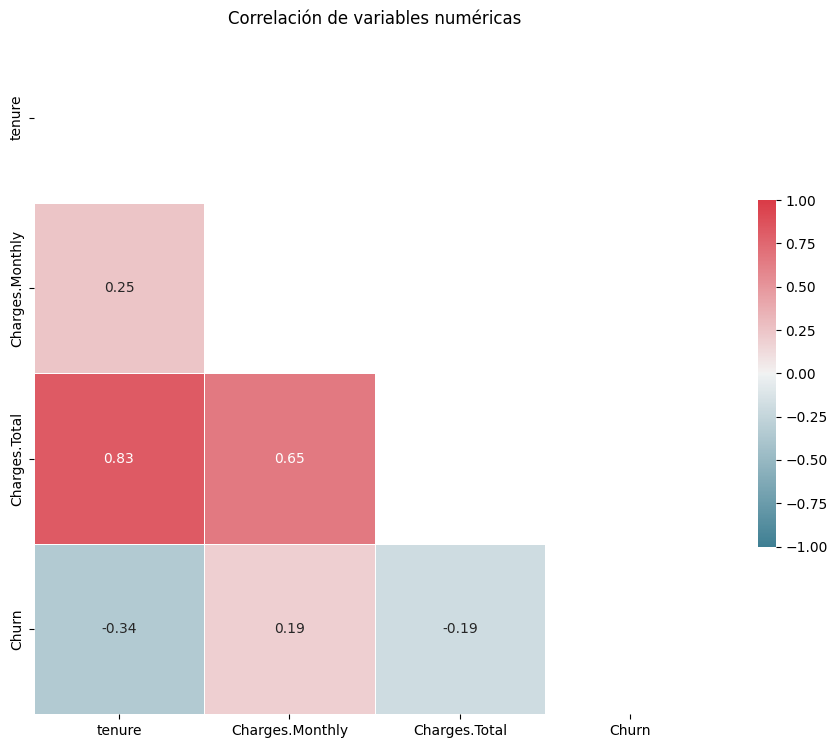

In [ ]:
df_num = df[['tenure','Charges.Monthly','Charges.Total','Churn']]

# Calculate the correlation matrix
corr = df_num.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
ax.set_title('Correlación de variables numéricas')




# Mostrar el mapa de calor (heatmap)
plt.show()

Exactitud: 0.5
Precisión: 0.5
Recall: 0.4
F1 Score: 0.444


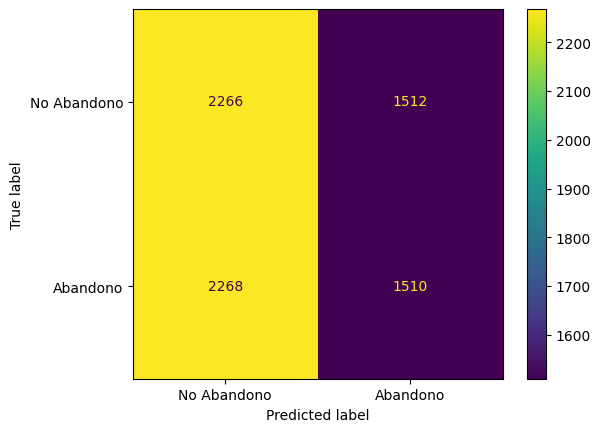

In [ ]:
modelo_dummy = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
y_predict_cv_dummy = cross_val_predict(modelo_dummy, X_train_balanceada, y_train_balanceada, cv = skf)
evaluacion_modelos(y_train_balanceada,y_predict_cv_dummy)

Exactitud: 0.76
Precisión: 0.757
Recall: 0.765
F1 Score: 0.761


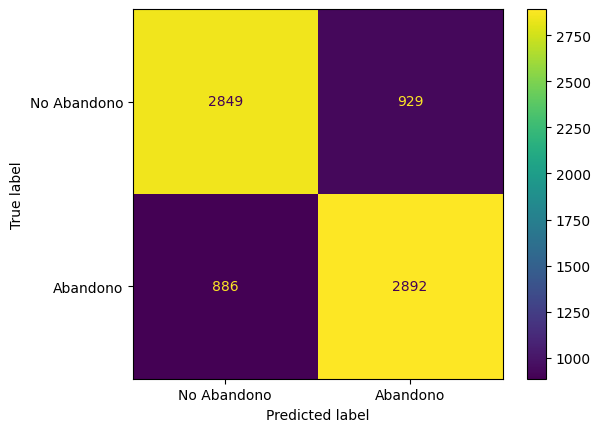

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state= 5)
y_pred_cv_arbol = cross_val_predict(modelo_arbol,X_train_balanceada,y_train_balanceada, cv = skf)
resultados_arbol = evaluacion_modelos(y_train_balanceada,y_pred_cv_arbol)


Exactitud: 0.829
Precisión: 0.814
Recall: 0.853
F1 Score: 0.833


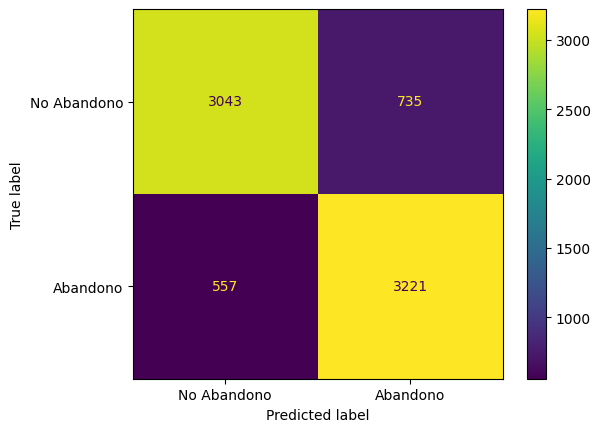

In [ ]:
modelo_rf = RandomForestClassifier(random_state= 5)
y_pred_cv_rf = cross_val_predict(modelo_rf, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_random = evaluacion_modelos(y_train_balanceada,y_pred_cv_rf)


Exactitud: 0.783
Precisión: 0.738
Recall: 0.879
F1 Score: 0.802


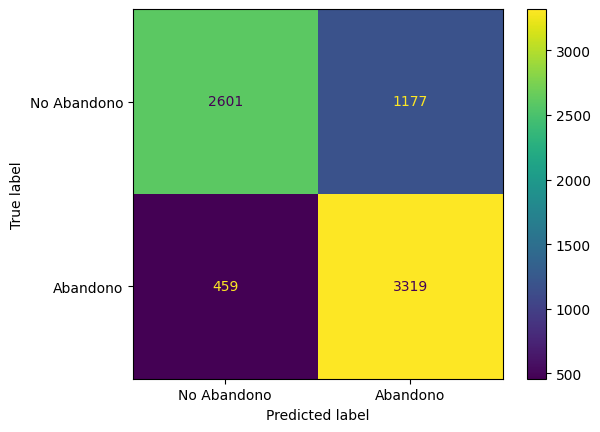

In [ ]:
modelo_knn = KNeighborsClassifier()
y_pred_cv_knn = cross_val_predict(modelo_knn, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_knn = evaluacion_modelos(y_train_balanceada,y_pred_cv_knn)

In [ ]:
modelo_arbol.fit(X_train_balanceada,y_train_balanceada)
y_pred_arbol = modelo_arbol.predict(X_val)

modelo_rf.fit(X_train_balanceada,y_train_balanceada)
y_pred_rf = modelo_rf.predict(X_val)

modelo_knn.fit(X_train_balanceada,y_train_balanceada)
y_pred_knn = modelo_knn.predict(X_val)

modelos = {
    'Árbol de Decisión': y_pred_arbol,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_val, pred)
    prec = precision_score(y_val, pred)
    rec = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)

    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla ordenada por F1 Score
tabla_resultados.sort_values(by='Recall', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
2,KNN,0.706,0.451,0.668,0.538
0,Árbol de Decisión,0.710,0.450,0.575,0.505
1,Random Forest,0.759,0.529,0.550,0.539


## Optimización de hiperparámetros
En este caso se decidió optimizar los hiperparámetros de los modelos utilizando la métrica de ``Recall``, ya que el objetivo principal es identificar correctamente a los clientes que abandonan la empresa, minimizando los falsos negativos.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 0.733
Precisión: 0.486
Recall: 0.675
F1 Score: 0.565


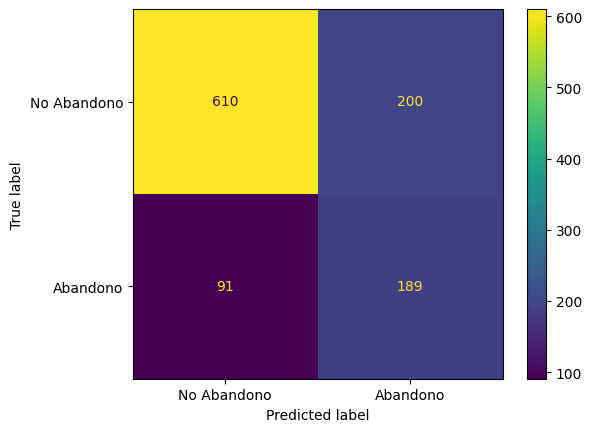

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

arbol = DecisionTreeClassifier(random_state=5)

grid_search = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanceada, y_train_balanceada)

best_tree = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred_best_tree = best_tree.predict(X_val)
resultados_best_tree = evaluacion_modelos(y_val, y_pred_best_tree)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud: 0.75
Precisión: 0.511
Recall: 0.693
F1 Score: 0.588


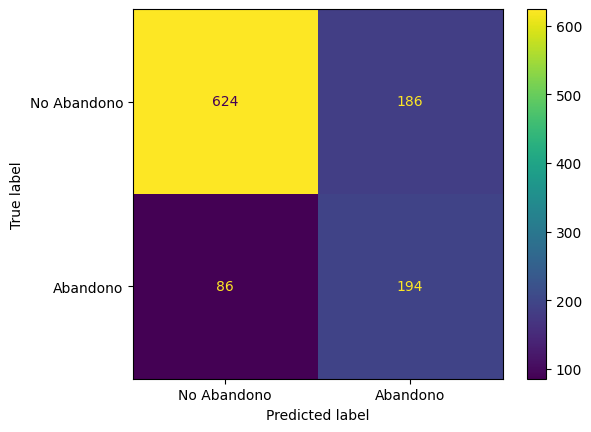

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=5),
    param_grid=param_grid_rf,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_balanceada, y_train_balanceada)

best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

y_pred_best_rf = best_rf.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Exactitud: 0.711
Precisión: 0.462
Recall: 0.75
F1 Score: 0.571


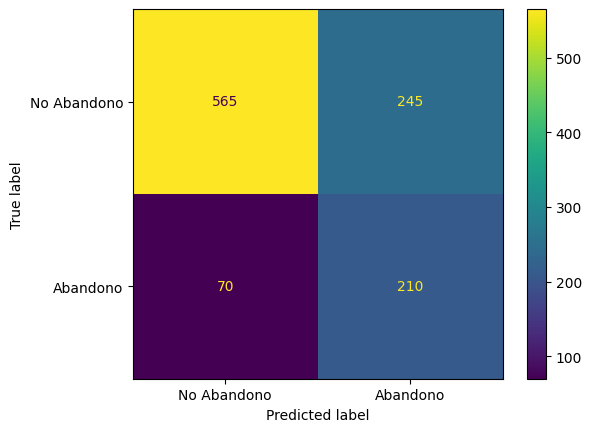

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_balanceada, y_train_balanceada)

best_knn = grid_search_knn.best_estimator_
print("Mejores hiperparámetros:", grid_search_knn.best_params_)

y_pred_best_knn = best_knn.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_knn)

# Resultados con datos de prueba y modelos con hiperparámetros

In [ ]:
y_pred_best_tree_test = best_tree.predict(X_test)
y_pred_best_rf_test = best_rf.predict(X_test)
y_pred_best_knn_test = best_knn.predict(X_test)

modelos = {
    'Árbol de decisiones con hiperparámetros': y_pred_best_tree_test,
    'Random Forest con hiperparámetros': y_pred_best_rf_test,
    'KNN con hiperparámetros': y_pred_best_knn_test,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

tabla_resultados.sort_values(by='Recall', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
2,KNN con hiperparámetros,0.721,0.475,0.769,0.587
1,Random Forest con hiperparámetros,0.754,0.517,0.701,0.595
0,Árbol de decisiones con hiperparámetros,0.728,0.480,0.669,0.559
